In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
from sklearn.datasets import make_blobs

In [145]:
#Create a dataset

In [146]:
data=make_blobs(n_samples=300, n_features=2, centers=2,cluster_std=1.0,random_state=101)  #300 rows, 2 clusters, 1.0 for noise in clusters

In [147]:
data

(array([[ -8.87772115,  -6.76007802],
        [  0.630638  ,   3.10707466],
        [ -0.24060881,   2.82068999],
        [ -7.83909113,  -8.20754485],
        [-10.9729082 ,  -7.39067645],
        [-10.81648852,  -5.82372891],
        [  0.96977807,   0.50825184],
        [-10.29728144,  -7.21832357],
        [  0.04271579,   3.50389089],
        [  0.15391601,   2.19349145],
        [ -9.81008003,  -5.35480445],
        [-11.18334003,  -6.7004804 ],
        [  0.51876688,   3.39210906],
        [ -8.09111654,  -6.92631627],
        [  1.1112886 ,   0.704398  ],
        [ -7.49469451,  -7.06186612],
        [ -0.75249891,   2.31574949],
        [  0.72046137,   1.63484242],
        [ -0.80867204,   1.41371822],
        [  1.13010192,  -0.25418504],
        [-10.6252148 ,  -6.71479817],
        [ -0.06311641,   3.15682868],
        [  0.56609951,   3.41000402],
        [ -9.10474956,  -7.83047821],
        [-11.33926304,  -7.83622233],
        [  0.29639341,   2.06317757],
        [ -0

In [148]:
X,y=data #do tuple unpacking to get features and labels

In [149]:
np.random.seed(seed=101)
z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)

In [150]:
type(X)

numpy.ndarray

In [151]:
feat=pd.DataFrame(X)

In [152]:
feat

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676
...,...,...
295,1.320546,2.605592
296,-8.043916,-6.010589
297,-9.733566,-7.460380
298,-10.722075,-5.568565


In [153]:
feat=pd.concat([feat,z_noise],axis=1)

In [154]:
feat.columns=["X1","X2","X3"]

In [155]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [156]:
plt.scatter(feat["X1"],feat["X2"],c=y) #Color them by zeros and ones

In [157]:
from mpl_toolkits.mplot3d import Axes3D

In [158]:
%matplotlib notebook

<IPython.core.display.Javascript object>


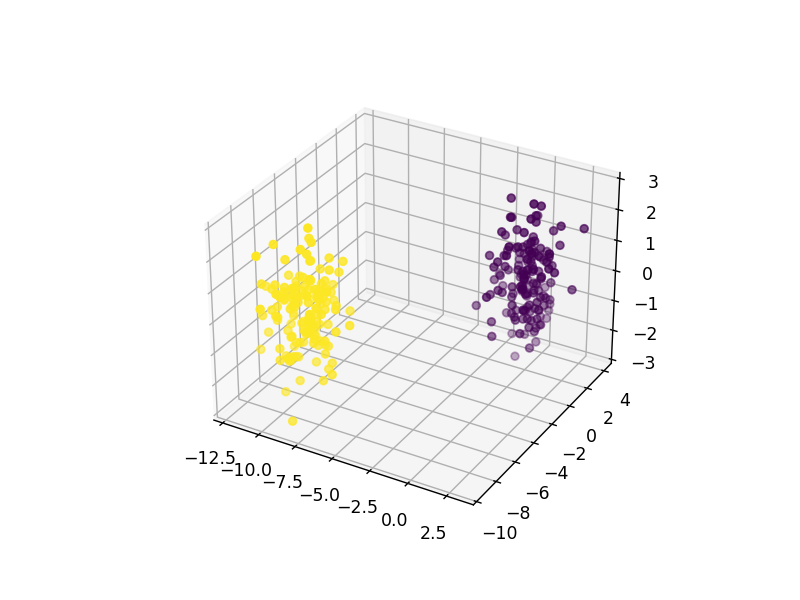

In [161]:
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(feat["X1"],feat["X2"],feat["X3"],c=y)

In [162]:
#there is no separation between two clusters in X3 direction

In [163]:
#With outoencoders we hope to see that feature X3 is not significant and is reduced

# Creating an autoencoder

In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [165]:
from tensorflow.keras.optimizers import SGD  #Stochastic gradient desend

In [166]:
#3-->2-->3

In [167]:
encoder=Sequential()
encoder.add(Dense(units=2,activation="relu",input_shape=[3]))

In [168]:
decoder=Sequential()
decoder.add((Dense(units=3,activation="relu",input_shape=[2])))

In [169]:
autoencoder=Sequential([encoder,decoder])

In [170]:
autoencoder.compile(loss="mse",optimizer=SGD(lr=1.5))

C:\Users\17573\anaconda3\envs\myenv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [171]:
#Now we need to scale the data

In [172]:
from sklearn.preprocessing import MinMaxScaler

In [173]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(feat)

In [174]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2735
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2544
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2545
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2550
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2401


In [175]:
encoded_2dim=encoder.predict(scaled_data)

10/10 [==============================] - 0s 998us/step


In [176]:
encoded_2dim.shape

(300, 2)

In [177]:
encoded_2dim

array([[0.        , 0.        ],
       [0.        , 0.69524384],
       [0.        , 0.6624225 ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.17103598],
       [0.        , 0.5897316 ],
       [0.        , 0.        ],
       [0.        , 0.9047712 ],
       [0.        , 0.6218571 ],
       [0.        , 0.14256066],
       [0.        , 0.12461138],
       [0.        , 0.7469919 ],
       [0.        , 0.09157215],
       [0.        , 0.60916466],
       [0.        , 0.        ],
       [0.        , 0.6752281 ],
       [0.        , 0.49261314],
       [0.        , 0.44768548],
       [0.        , 0.42910853],
       [0.        , 0.0600537 ],
       [0.        , 0.63504916],
       [0.        , 0.8725007 ],
       [0.        , 0.05724259],
       [0.        , 0.00888439],
       [0.        , 0.6335901 ],
       [0.        , 0.72396463],
       [0.        , 0.46955758],
       [0.        , 0.        ],
       [0.        , 0.03436131],
       [0.

In [178]:
scaled_data.shape

(300, 3)

<IPython.core.display.Javascript object>


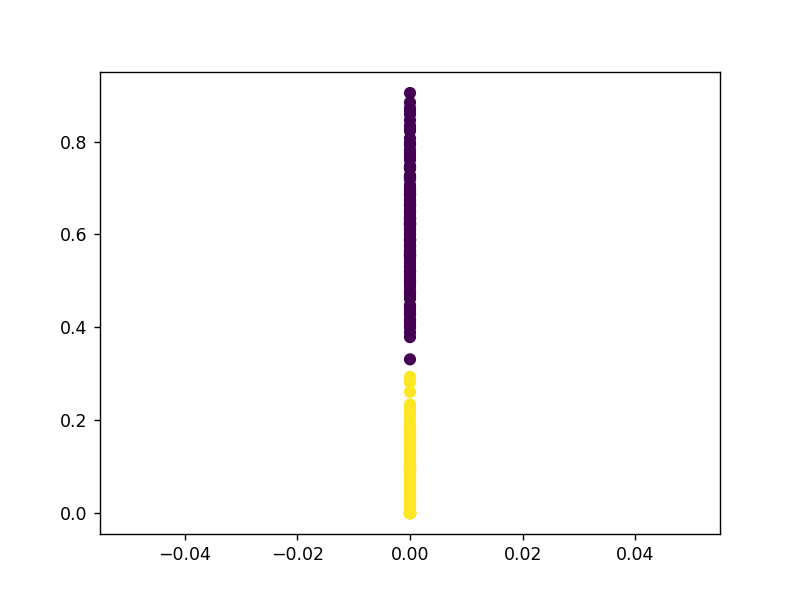

In [179]:
#Close the 3d plot above to be able to plot thisone

plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)